In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [5]:
iris = load_iris()
X = iris.data[:, :2]  # Use only first two features for 2D visualization
y = iris.target
feature_names = iris.feature_names[:2]
target_names = iris.target_names


In [15]:
scaler = StandardScaler()#WE CAN USE EITHER STANDARDIZATION OR NORMALIZATION FOR THIS BUT INCASE YOU HAVE OUTLIERS STANDARDIZATION IS BETTER
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [8]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"\nK = {k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


K = 1
Accuracy: 0.7111111111111111
Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  7  6]]

K = 3
Accuracy: 0.8
Confusion Matrix:
[[19  0  0]
 [ 0  6  7]
 [ 0  2 11]]

K = 5
Accuracy: 0.7777777777777778
Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  4  9]]

K = 7
Accuracy: 0.8
Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  4  9]]

K = 9
Accuracy: 0.8222222222222222
Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  2 11]]


In [12]:
def plot_decision_boundary(knn, X, y, k):
    h = .02  # step size
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold.colors, edgecolor='k') # Pass the colors from the colormap
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

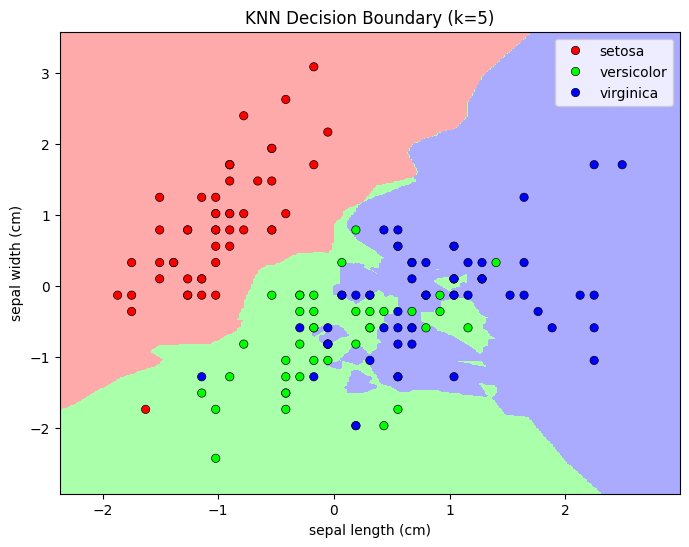

In [13]:
best_k = 5
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_scaled, y)
plot_decision_boundary(knn_best, X_scaled, y, best_k)